In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
!unzip -q /content/drive/MyDrive/data.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

--2025-07-18 16:28:39--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-07-18 16:28:40 (49.6 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]



In [ ]:
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 109
Number of annotation files: 109
Images moving to train: 98
Images moving to validation: 11


In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 1
names:
- ID_card


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 404MB/s]
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/11 /content/data/validation/images/07f70ee2-30.jpg: 640x480 1 ID_card, 86.7ms
image 2/11 /content/data/validation/images/225b09a7-15.jpg: 640x480 1 ID_card, 16.8ms
image 3/11 /content/data/validation/images/26925fa8-59.jpg: 640x480 1 ID_card, 16.5ms
image 4/11 /content/data/validation/images/291ff650-11.jpg: 640x480 1 ID_card, 12.4ms
image 5/11 /content/data/validation/images/3fa7b4d2-23.jpg: 640x480 1 ID_card, 12.4ms
image 6/11 /content/data/validation/images/72f80163-52.jpg: 640x480 1 ID_card, 12.4ms
image 7/11 /content/data/validation/images/9e8374a4-78.jpg: 640x480 1 ID_card, 14.6ms
image 8/11 /content/data/validation/images/a1f7ec4e-94.jpg: 640x480 1 ID_card, 12.4ms
image 9/11 /content/data/validation/images/a9d9aad8-32.jpg: 640x480 1 ID_card, 12.4ms
image 10/11 /content/data/validation/images/dd5aaa10-104.j

In [ ]:
 import glob
 from IPython.display import Image, display
 for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
   display(Image(filename=image_path, height=400))#
   print('\n')
  ### تم مسح الاوتبوت الي هنا للخصوصيه وكده ###

#7.&nbsp;Deploy Model

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/BoxF1_curve.png (deflated 17%)
  adding: train/BoxR_curve.png (deflated 19%)
  adding: train/val_batch0_pred.jpg (deflated 8%)
  adding: train/results.csv (deflated 60%)
  adding: train/BoxP_curve.png (deflated 22%)
  adding: train/train_batch300.jpg (deflated 12%)
  adding: train/train_batch1.jpg (deflated 3%)
  adding: train/args.yaml (deflated 53%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/confusion_matrix_normalized.png (deflated 37%)
  adding: train/train_batch302.jpg (deflated 8%)
  adding: train/labels.jpg (deflated 48%)
  adding: train/BoxPR_curve.png (deflated 30%)
  adding: train/results.png (deflated 6%)
  adding: train/confusion_matrix.png (deflated 40%)
  adding: train/val_batch0_labels.jpg (deflated 8%)
  adding: train/labels_correlogram.jpg (deflated 47%)
  adding: train/t

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/Test.png: 640x512 1 ID_card, 51.2ms
Speed: 3.4ms preprocess, 51.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict4


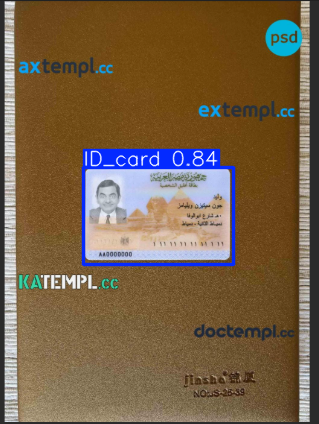

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/my_model.pt")

results = model('/content/Test.png', save=True)

results[0].show()  # يعرض الصورة بالبوكسات
